In [1]:
import pandas as pd
import os
import datetime as dt

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import seaborn as sns

import statsmodels.api as sm
#from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
file_path = '{}/nem-data/nemde_clean/df_DUID_CO2_mean.pkl'.format(os.environ['HOME'])
df_mean = pd.read_pickle(file_path)
print(df_mean.shape)
df_mean.head()

(1060704, 2)


,Price,CO2E_EMISSIONS_FACTOR
2019-08-01 03:55:00,79.52391,0.380340
2019-08-01 03:50:00,79.17710,0.456409
2019-08-01 03:45:00,85.14416,0.573436
2019-08-01 03:40:00,84.78689,0.573436
2019-08-01 03:35:00,84.78346,0.573436


In [3]:
df_mean1 = df_mean[(df_mean.index > dt.datetime(2019,7,31))]
df_mean2 = df_mean[(df_mean.index > dt.datetime(2019,4,30))]
print(df_mean.shape)
df_mean2.head()

(1060704, 2)


,Price,CO2E_EMISSIONS_FACTOR
2019-08-01 03:55:00,79.52391,0.380340
2019-08-01 03:50:00,79.17710,0.456409
2019-08-01 03:45:00,85.14416,0.573436
2019-08-01 03:40:00,84.78689,0.573436
2019-08-01 03:35:00,84.78346,0.573436


In [4]:
print(df_mean2.index.min())
print(df_mean2.index.max())

2019-04-30 00:05:00
2019-08-01 03:55:00


/home/bastian/Environment/DSR_portfolio/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


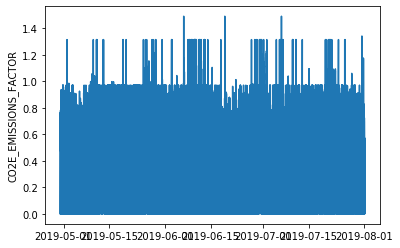

In [5]:
fig = sns.lineplot(df_mean2.index, df_mean2.CO2E_EMISSIONS_FACTOR);

In [6]:
df_mean2.CO2E_EMISSIONS_FACTOR.dropna(inplace=True)

/home/bastian/Environment/DSR_portfolio/lib/python3.6/site-packages/pandas/core/series.py:4784: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


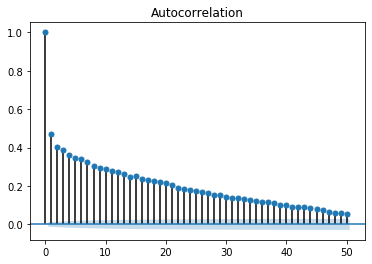

In [7]:
plot_acf(df_mean2.CO2E_EMISSIONS_FACTOR, lags=50);

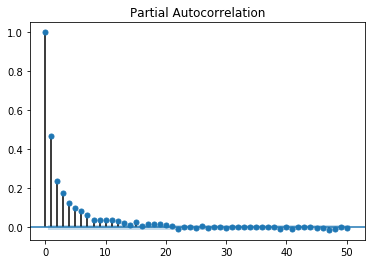

In [8]:
plot_pacf(df_mean2.CO2E_EMISSIONS_FACTOR, lags=50);

In [14]:
df_mean2["CO2_diff1"] = df_mean2.CO2E_EMISSIONS_FACTOR.shift(1) - df_mean2.CO2E_EMISSIONS_FACTOR
df_mean2.dropna(inplace=True)

/home/bastian/Environment/DSR_portfolio/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/bastian/Environment/DSR_portfolio/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
df_mean2.head()

,Price,CO2E_EMISSIONS_FACTOR,CO2_diff1
2019-08-01 03:45:00,85.14416,0.573436,-0.117028
2019-08-01 03:40:00,84.78689,0.573436,0.000000
2019-08-01 03:35:00,84.78346,0.573436,0.000000
2019-08-01 03:30:00,85.51143,0.573436,0.000000
2019-08-01 03:25:00,81.06731,0.000000,0.573436


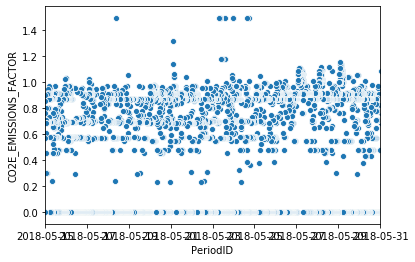

In [48]:
fig = sns.scatterplot(df_DUID_CO2_price3.index, df_DUID_CO2_price3.CO2E_EMISSIONS_FACTOR)
fig.set_xlim(dt.date(2018,5,15), dt.date(2018,5,31));